# Two-body Gravitational Orbits

Defines a GravitationalOrbits class that solves Lagrange's equations for two bodies orbiting under graviational attraction.

## System of two bodies 

For two bodies of masses m1 and m2, the gravitational potential energy is given by

$\begin{align}
  U = \frac{-G m_1 m_2}{\sqrt{(x_2-x_1)^2 +(y_2-y_1)^2}}
\end{align}$

where $(x_1,y_1)$ and $(x_2,y_2)$ are the co-ordinates of $m_1$ and $m_2$ with respect to the origin. We define

$\begin{align}
  r_{12} = \sqrt{(x_2-x_1)^2 +(y_2-y_1)^2}
\end{align}$

We also define the center of mass (CM) of the system to be at the origin, and set initial conditions such that the CM is at rest.

$\begin{align}
\therefore x_2(0) = -\frac{m_2}{m_1}x_1(0)\\
           y_2(0) = -\frac{m_2}{m_1}y_1(0)\\
           \dot x_2(0) = -\frac{m_2}{m_1} \dot x_1(0)\\
           \dot y_2(0) = -\frac{m_2}{m_1} \dot y_1(0)
\end{align}$

The kinetic energy for the system is given by

$\begin{align}
  T = \frac 12 m_1 (\dot x_1^2 + \dot y_1^2) + \frac 12 m_2 \dot (\dot x_2^2 + \dot y_2^2)
\end{align}$

The Lagrangian is obtained by

$\begin{align}
  \mathcal{L} &= T - U\\
              &= \frac 12 m_1 (\dot x_1^2 + \dot y_1^2) + \frac 12 m_2 \dot (\dot x_2^2 + \dot y_2^2)
              + \frac{G m_1 m_2}{\sqrt{(x_2-x_1)^2 +(y_2-y_1)^2}}
\end{align}$


## Lagrange's's equations

The general forces corresponding to our co-ordinates are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_1} = \frac{\partial\mathcal L}{\partial x_1}
 \quad\Longrightarrow\quad
 \ddot x_1 = \frac{G m_2 (x_2 - x_1)}{r_{12}^3}
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_1} = \frac{\partial\mathcal L}{\partial y_1}
 \quad\Longrightarrow\quad
 \ddot y_1 = \frac{G m_2 (y_2 - y_1)}{r_{12}^3}
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_2} = \frac{\partial\mathcal L}{\partial x_2}
 \quad\Longrightarrow\quad
 \ddot x_2 = \frac{-G m_1 (x_2 - x_1)}{r_{12}^3}
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_2} = \frac{\partial\mathcal L}{\partial y_2}
 \quad\Longrightarrow\quad
 \ddot y_2 = \frac{-G m_1 (y_2 - y_1)}{r_{12}^3}
\end{align}$

In [10]:
%matplotlib inline

In [11]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
from IPython.display import Image
import matplotlib.pyplot as plt

In [12]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## GravitationalOrbits class and utility functions

In [6]:
class GravitationalOrbits():
    """
    GravitationalOrbits class implements the parameters and Lagrange's equations for 
    two bodies orbiting under gravitational attraction.
     
    Parameters
    ----------
    m1 : float
        mass of first body
    m2 = float
        mass of second body
    G : float
        gravitational constant

    Methods
    -------
    dz_dt(t, z)
        Returns the right side of the differential equation in vector z, 
        given time t and the corresponding value of z.
    """
    def __init__(self, m1=1., m2=1., m3=1, G=1.
                ):
        self.G = G
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
    
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            A 8-component vector with z[0] = x1(t) and z[1] = x1_dot(t)
                                      z[2] = y1(t) and z[3] = y1_dot(t)
                                      z[4] = x2(t) and z[5] = x2_dot(t)
                                      z[6] = y2(t) and z[7] = y2_dot(t)
                                      z[8] = x3(t) and z[9] = x3_dot(t)
                                      z[10] = y3(t) and z[11] = y3_dot(t)
            
        Returns
        -------
        """
        r12 = np.sqrt((z[4] - z[0])**2 + (z[6] - z[2])**2)        # distance between the two bodies
        r13 = np.sqrt((z[8] - z[0])**2 + (z[10] - z[2])**2)
        r23 = np.sqrt((z[8] - z[4])**2 + (z[10] - z[6])**2)

        return [z[1], self.G * self.m2 * (z[4] - z[0])/(r12)**3 + self.G * self.m3 * (z[8] - z[0])/(r13)**3,
                z[3], self.G * self.m2 * (z[6] - z[2])/(r12)**3 + self.G * self.m3 * (z[10] - z[2])/(r13)**3, 
                z[5], - self.G * self.m1 * (z[4] - z[0])/(r12)**3 + self.G * self.m3 * (z[8] - z[4])/(r23)**3,
                z[7], - self.G * self.m1 * (z[6] - z[2])/(r12)**3 + self.G * self.m3 * (z[10] - z[6])/(r23)**3,
                z[9], - self.G * self.m1 * (z[8] - z[0])/(r13)**3 - self.G * self.m2 * (z[8] - z[4])/(r23)**3,
                z[11], - self.G * self.m1 * (z[10] - z[2])/(r13)**3 - self.G * self.m2 * (z[10] - z[6])/(r23)**3]  
                
    
    def solve_ode(self, t_pts, z_0, abserr=1.0e-8, relerr=1.0e-8):                            
        """                                                                    
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts, method = 'RK23',
                             atol=abserr, rtol=relerr)
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot, x3, x3_dot, y3, y3_dot = solution.y

        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot, x3, x3_dot, y3, y3_dot

In [7]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [8]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Plotting the orbits

Working from the CM frame, which is at rest, and setting $m_2 >> m_1$,

In [37]:
# Labels for individual plot axes
orbit_labels = (r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

G = 20
m1 = 1
m2 = 1
m3 = 1

# Instantiate a set of orbits
o1 = GravitationalOrbits(m1, m2, m3, G)

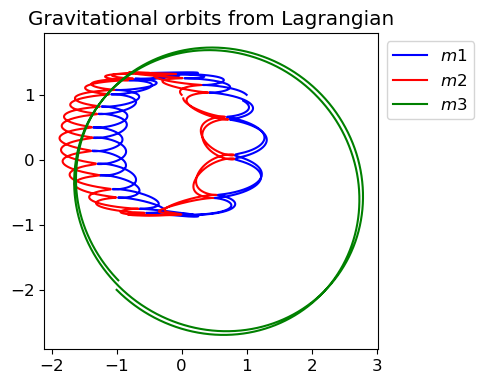

In [41]:
# We set initial conditions such that the center of mass velocity is zero.
x1_0, x1_dot_0 = 1, -1
y1_0, y1_dot_0 = 1, 1
x2_0, x2_dot_0 = 0, -1
y2_0, y2_dot_0 = 1, 1
x3_0, x3_dot_0 = -((m1/m3) * x1_0) - ((m2/m3) * x2_0), -((m1/m3) * x1_dot_0) -((m2/m3) * x2_dot_0)
y3_0, y3_dot_0 = -((m1/m3) * y1_0) - ((m2/m3) * y2_0), -((m1/m3) * y1_dot_0) -((m2/m3) * y2_dot_0)

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0, x3_0, x3_dot_0, y3_0, y3_dot_0]

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot, x3, x3_dot, y3, y3_dot = o1.solve_ode(t_pts, z_0)


# start the plot!
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x1, y1, color='blue', label= r'$m1$') 
ax.plot(x2, y2, color='red', label= r'$m2$')
ax.plot(x3, y3, color='green', label= r'$m3$')
plt.title('Gravitational orbits from Lagrangian')
plt.legend(bbox_to_anchor =(1,1))
ax.set_aspect(1)

fig.tight_layout()